# Practise Case Machine Learning

### By Hendri Prabowo

Scenario:
This data-set contains transaction data in a supermarket. You as a data scientist at the retail company are expected to be able to process the data that has been collected so that it becomes valuable insight. Please answer the question below and explore your creativity. 

Some goals of this project:
1.	What items customers buy the most and are there any items we should ignore?
2.	What is our strategy to increase sales based on our export destination countries?
3.	Do customer segmentation appropriately. Please explain in detail and completely
4.	Get the hidden insight from the data

## Import Data and Load Library

In [77]:
# Load library
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import math
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy
import matplotlib.mlab as mlab
import matplotlib.cm as cm

In [78]:
# Import data
data=pd.read_csv('ML_2_Fellow.csv',encoding= 'unicode_escape')
data.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Preprocessing data

In [79]:
# Check data value in kode_bayar
data.Kode_Bayar.value_counts()

573585                                                                              1101
581219                                                                               742
581492                                                                               720
580729                                                                               716
558475                                                                               689
                                                                                    ... 
549145                                                                                 1
578347,21506,"FANCY FONT BIRTHDAY CARD, ",4,11/24/2011 9:26,0.83,,United Kingdom       1
541219,21900,"KEY FOB , SHED",1,1/14/2011 14:06,1.63,,United Kingdom                   1
C550536                                                                                1
554631                                                                                 1
Name: Kode_Bayar, Len

In [80]:
# Missing value check
data.isnull().sum()
# Error make some value missing

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

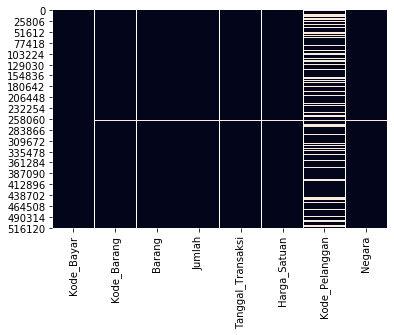

In [81]:
# Visualizing value check
sns.heatmap(data.isnull(), cbar=False)

In [82]:
# Drop missing value in Kode_barang, tanggal_transaksi, jumlah, harga_satuan, negara and error in kode_bayar
data=data.dropna(subset=['Kode_Barang', 'Tanggal_Transaksi','Jumlah','Harga_Satuan','Negara'])
data.isnull().sum()

Kode_Bayar                0
Kode_Barang               0
Barang                 1454
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       132692
Negara                    0
dtype: int64

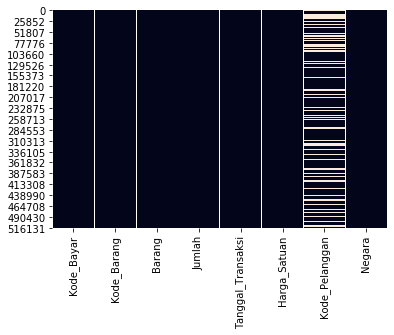

In [83]:
# Visualizing value check
sns.heatmap(data.isnull(), cbar=False)

In [84]:
# Check data value in kode_bayar again
data.Kode_Bayar.value_counts()

573585     1101
581219      742
581492      720
580729      716
558475      689
           ... 
550649        1
C551557       1
C570835       1
C555883       1
554631        1
Name: Kode_Bayar, Length: 25858, dtype: int64

In [85]:
# Remove Kode_Barang contain cancel transaction
data = data[~data.Kode_Bayar.str.contains("C", na=False)]
data.Kode_Bayar.value_counts()

573585    1101
581219     742
581492     720
580729     716
558475     689
          ... 
551569       1
549585       1
540797       1
565368       1
554631       1
Name: Kode_Bayar, Length: 22040, dtype: int64

In [86]:
# Check data value in kode_barang
data.Kode_Barang.value_counts()

85123A    2271
85099B    2115
22423     2022
47566     1707
20725     1595
          ... 
21858        1
23001        1
72789        1
21412        1
79323B       1
Name: Kode_Barang, Length: 3987, dtype: int64

In [87]:
# Check data value in barang
data.Barang.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
                                      ... 
incorrectly put back into stock          1
michel oops                              1
SET 10 CARDS 3 WISE MEN 17107            1
cracked                                  1
PINK CHERRY LIGHTS                       1
Name: Barang, Length: 4097, dtype: int64

In [88]:
# Check data value in Jumlah
data.Jumlah.value_counts()

 1.0       146029
 2.0        81067
 12.0       60109
 6.0        40595
 4.0        38165
            ...  
-432.0          1
-162.0          1
-1206.0         1
-750.0          1
-1050.0         1
Name: Jumlah, Length: 678, dtype: int64

In [89]:
# Remove data in jumlah with negative value
data=data[(data['Jumlah']>=0)]
data.Jumlah.value_counts()

1.0       146029
2.0        81067
12.0       60109
6.0        40595
4.0        38165
           ...  
430.0          1
234.0          1
375.0          1
230.0          1
2040.0         1
Name: Jumlah, Length: 392, dtype: int64

In [90]:
# Check data value in Tanggal_Transaksi
data.Tanggal_Transaksi.value_counts()

10/31/2011 14:41    1101
12/8/2011 9:28       742
12/9/2011 10:03      720
12/5/2011 17:24      716
6/29/2011 15:58      689
                    ... 
12/8/2010 12:09        1
11/10/2011 18:08       1
10/4/2011 10:33        1
4/6/2011 15:28         1
1/16/2011 12:44        1
Name: Tanggal_Transaksi, Length: 19041, dtype: int64

In [91]:
# Check data value in Harga_Satuan
data.Jumlah.value_counts()

1.0       146029
2.0        81067
12.0       60109
6.0        40595
4.0        38165
           ...  
430.0          1
234.0          1
375.0          1
230.0          1
2040.0         1
Name: Jumlah, Length: 392, dtype: int64

In [92]:
# Check data value in Kode_Pelanggan
data.Kode_Pelanggan.value_counts()

17841.0    7755
14911.0    5636
14096.0    5021
12748.0    4556
14606.0    2587
           ... 
15823.0       1
15802.0       1
15753.0       1
15668.0       1
12346.0       1
Name: Kode_Pelanggan, Length: 4337, dtype: int64

In [93]:
# Check data value in Negara
data.Negara.value_counts()

United Kingdom          480601
Germany                   8998
France                    8376
EIRE                      7837
Spain                     2465
Netherlands               2347
Belgium                   2022
Switzerland               1956
Portugal                  1496
Australia                 1177
Norway                    1066
Italy                      748
Channel Islands            744
Finland                    678
Cyprus                     607
Sweden                     448
Unspecified                444
Austria                    396
Denmark                    376
Poland                     329
Japan                      313
Israel                     292
Hong Kong                  281
Singapore                  221
Iceland                    181
USA                        179
Canada                     147
Greece                     144
Malta                      111
United Arab Emirates        67
European Community          60
RSA                         58
Lebanon 

In [94]:
# Check data type
data.dtypes

Kode_Bayar            object
Kode_Barang           object
Barang                object
Jumlah               float64
Tanggal_Transaksi     object
Harga_Satuan         float64
Kode_Pelanggan       float64
Negara                object
dtype: object

In [95]:
# Change data type Tanggal_Transaksi
data['Tanggal_Transaksi']=pd.to_datetime(data['Tanggal_Transaksi'])
data.dtypes

Kode_Bayar                   object
Kode_Barang                  object
Barang                       object
Jumlah                      float64
Tanggal_Transaksi    datetime64[ns]
Harga_Satuan                float64
Kode_Pelanggan              float64
Negara                       object
dtype: object

In [96]:
# Create Jumlah_Total Column
data['Jumlah_Total']=data['Jumlah']*data['Harga_Satuan']
data

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Jumlah_Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## Number 1

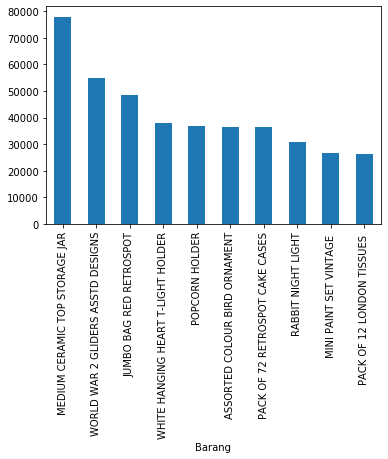

In [97]:
# Top 10 most buy
data.groupby('Barang')['Jumlah'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

In [98]:
# Top 10 most buy
data.groupby('Barang')['Jumlah'].sum().sort_values(ascending=False)[:10]

Barang
MEDIUM CERAMIC TOP STORAGE JAR        78033.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047.0
JUMBO BAG RED RETROSPOT               48478.0
WHITE HANGING HEART T-LIGHT HOLDER    37895.0
POPCORN HOLDER                        36761.0
ASSORTED COLOUR BIRD ORNAMENT         36461.0
PACK OF 72 RETROSPOT CAKE CASES       36419.0
RABBIT NIGHT LIGHT                    30788.0
MINI PAINT SET VINTAGE                26633.0
PACK OF 12 LONDON TISSUES             26339.0
Name: Jumlah, dtype: float64

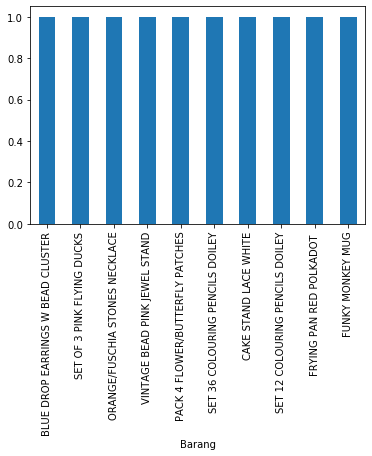

In [99]:
# Top 10 most not buy
data.groupby('Barang')['Jumlah'].sum()[data.groupby('Barang')['Jumlah'].sum()>0].sort_values(ascending=True)[:10].plot(kind='bar')

In [100]:
# Item most not buy
data.groupby('Barang')['Jumlah'].sum()[data.groupby('Barang')['Jumlah'].sum()<=1]

Barang
 I LOVE LONDON MINI RUCKSACK          1.0
*Boombox Ipod Classic                 1.0
Amazon Adjustment                     1.0
BAROQUE BUTTERFLY EARRINGS MONTANA    1.0
BAROQUE BUTTERFLY EARRINGS RED        1.0
                                     ... 
TINY CRYSTAL BRACELET RED             1.0
VINTAGE BEAD PINK JEWEL STAND         1.0
WATERING CAN SINGLE HOOK PISTACHIO    1.0
WIRE FLOWER T-LIGHT HOLDER            1.0
for online retail orders              1.0
Name: Jumlah, Length: 68, dtype: float64

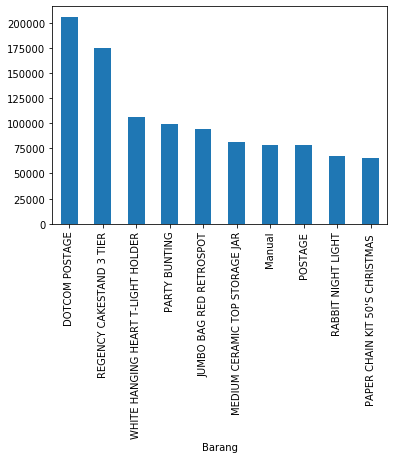

In [101]:
# Top 10 most total_amount
data.groupby('Barang')['Jumlah_Total'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

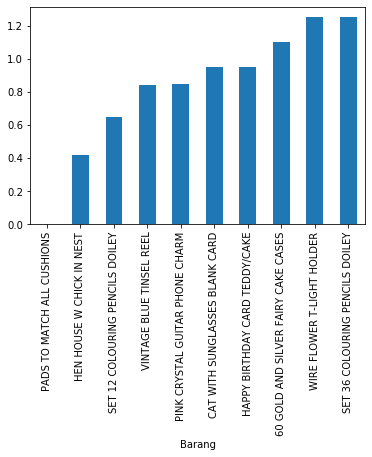

In [102]:
# Top 10 lowest total_amount
data.groupby('Barang')['Jumlah_Total'].sum()[data.groupby('Barang')['Jumlah_Total'].sum()>0].sort_values(ascending=True)[:10].plot(kind='bar')

## Number 2

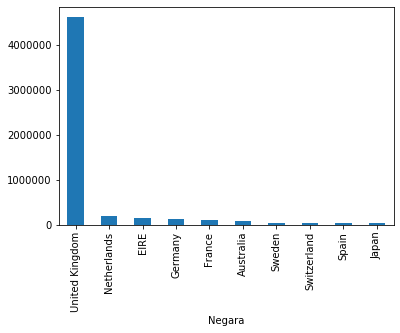

In [103]:
# Top 10 most buy country
data.groupby('Negara')['Jumlah'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

In [104]:
# Top 10 most buy country
data.groupby('Negara')['Jumlah'].sum().sort_values(ascending=False)

Negara
United Kingdom          4602336.0
Netherlands              199149.0
EIRE                     145299.0
Germany                  118639.0
France                   111713.0
Australia                 82169.0
Sweden                    35795.0
Switzerland               30466.0
Spain                     27712.0
Japan                     25692.0
Belgium                   23179.0
Norway                    19250.0
Portugal                  16210.0
Finland                   10648.0
Channel Islands            9421.0
Denmark                    8163.0
Italy                      7568.0
Cyprus                     6267.0
Singapore                  5235.0
Austria                    4863.0
Hong Kong                  4757.0
Israel                     4369.0
Poland                     3680.0
Unspecified                3298.0
Canada                     2725.0
USA                        2458.0
Iceland                    2446.0
Greece                     1551.0
United Arab Emirates        970.0
Malta  

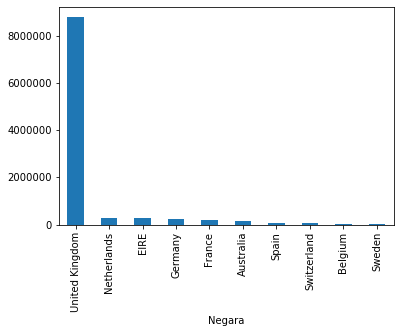

In [105]:
# Top 10 most total amount country
data.groupby('Negara')['Jumlah_Total'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

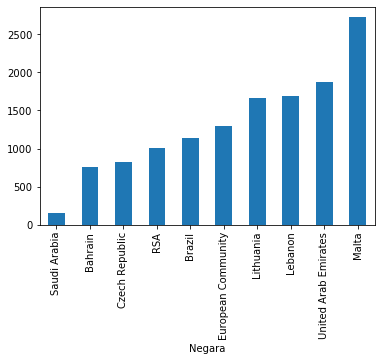

In [106]:
# Top 10 lowest total amount country
data.groupby('Negara')['Jumlah_Total'].sum().sort_values(ascending=True)[:10].plot(kind='bar')

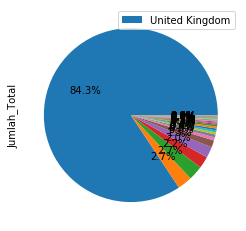

In [107]:
# Top 10 most total amount country
data.groupby('Negara')['Jumlah_Total'].sum().sort_values(ascending=False).plot(kind='pie',fontsize=10,labels=None,autopct='%1.1f%%').legend(labels=['United Kingdom'])

## Number 3

In [108]:
# Calculate RFM
data_rfm=data
last_date = data_rfm.Tanggal_Transaksi.max()
rfm = data_rfm.groupby("Kode_Pelanggan").agg({
    "Tanggal_Transaksi": lambda values: (last_date - values.max()).days,
    "Kode_Bayar" : lambda values: len(values),
    "Jumlah_Total": lambda values: np.sum(values)
})
rfm.columns = ["recency", "frequency", "monetary"]
rfm=rfm[(rfm['recency']>0) & (rfm['frequency']>0) & (rfm['monetary']>0)]
rfm

,recency,frequency,monetary
Kode_Pelanggan,,,
12346.0,325,1,77183.60
12347.0,1,181,4299.80
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

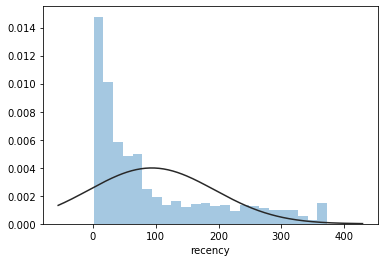

In [109]:
# Check recency distribution
ax = sns.distplot(rfm['recency'],fit=scipy.stats.norm, kde=False, hist=True)
ax.plot()

[]

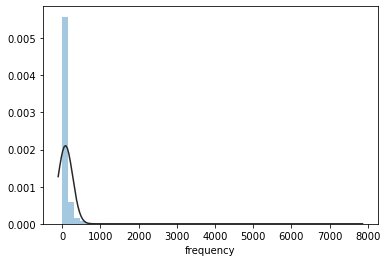

In [110]:
# Check frequency distribution
ax = sns.distplot(rfm['frequency'],fit=scipy.stats.norm, kde=False, hist=True)
ax.plot()

[]

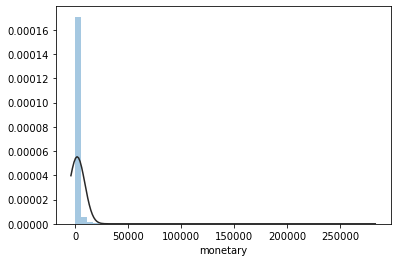

In [111]:
# Check monetary distribution
ax = sns.distplot(rfm['monetary'],fit=scipy.stats.norm, kde=False, hist=True)
ax.plot()

In [112]:
rfm.describe()

,recency,frequency,monetary
count,4244.000000,4244.000000,4244.000000
mean,93.563619,84.479500,1809.158853
std,100.134552,189.155474,7214.667656
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,302.150000
50%,51.000000,39.000000,656.565000
75%,146.250000,96.000000,1588.312500
max,373.000000,7755.000000,278788.580000


In [113]:
# Log transformation
rfm['recency_log'] = rfm['recency'].apply(math.log)
rfm['frequency_log'] = rfm['frequency'].apply(math.log)
rfm['monetary_log'] = rfm['monetary'].apply(math.log)
feature_vector = ['recency_log','frequency_log', 'monetary_log']
X_subset = rfm[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
recency_log,4244.0,-2.644088e-16,1.000118,-2.663119,-0.631884,0.100007,0.840355,1.498324
frequency_log,4244.0,-1.088641e-16,1.000118,-2.784198,-0.618559,0.016139,0.704678,4.061620
monetary_log,4244.0,2.139351e-16,1.000118,-4.431179,-0.677643,-0.050656,0.663021,4.837917


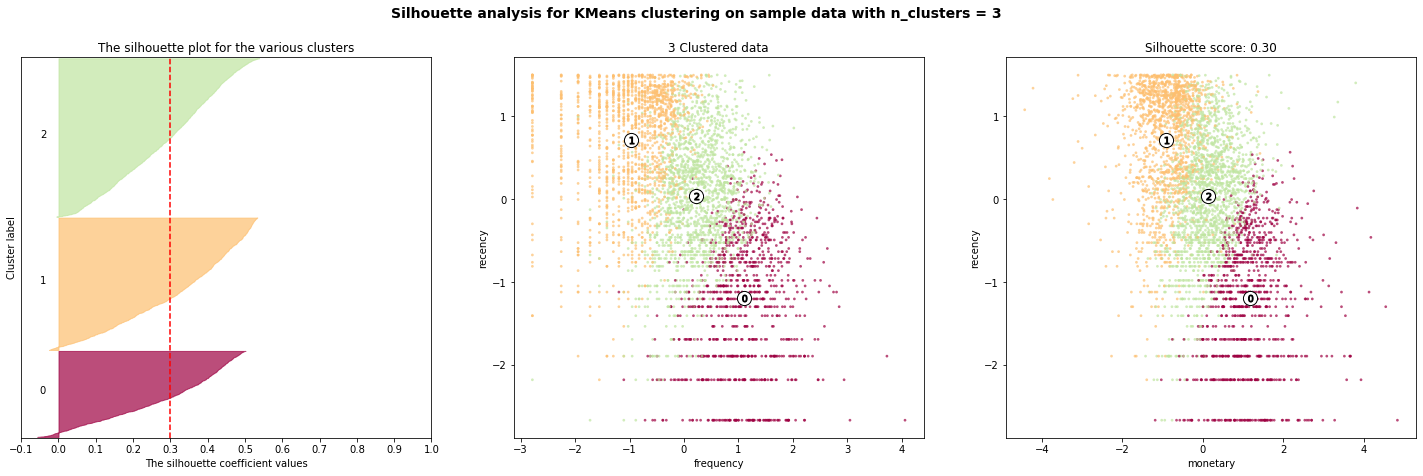

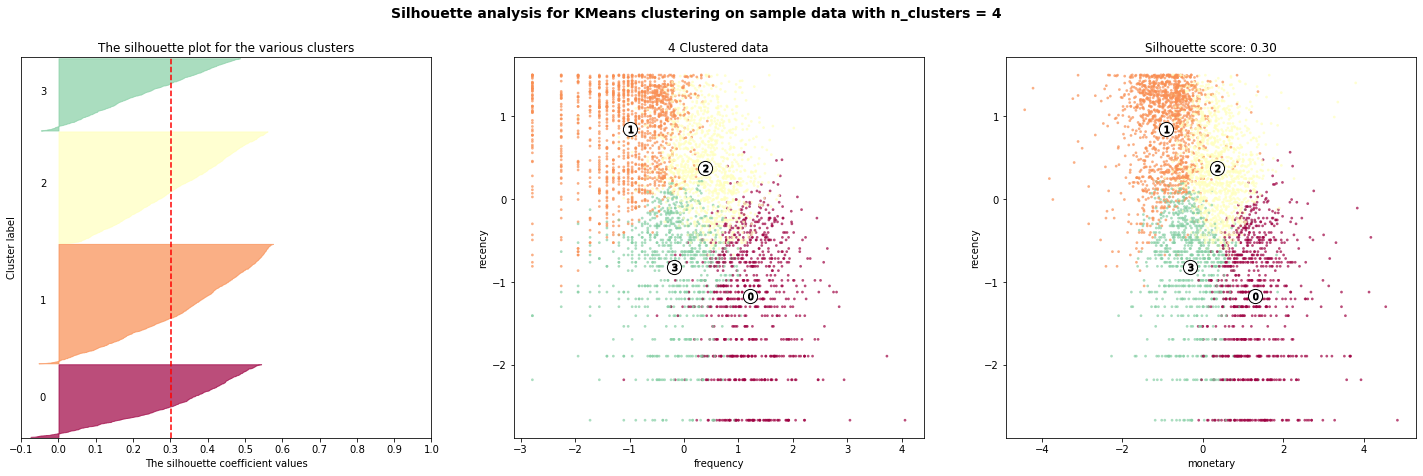

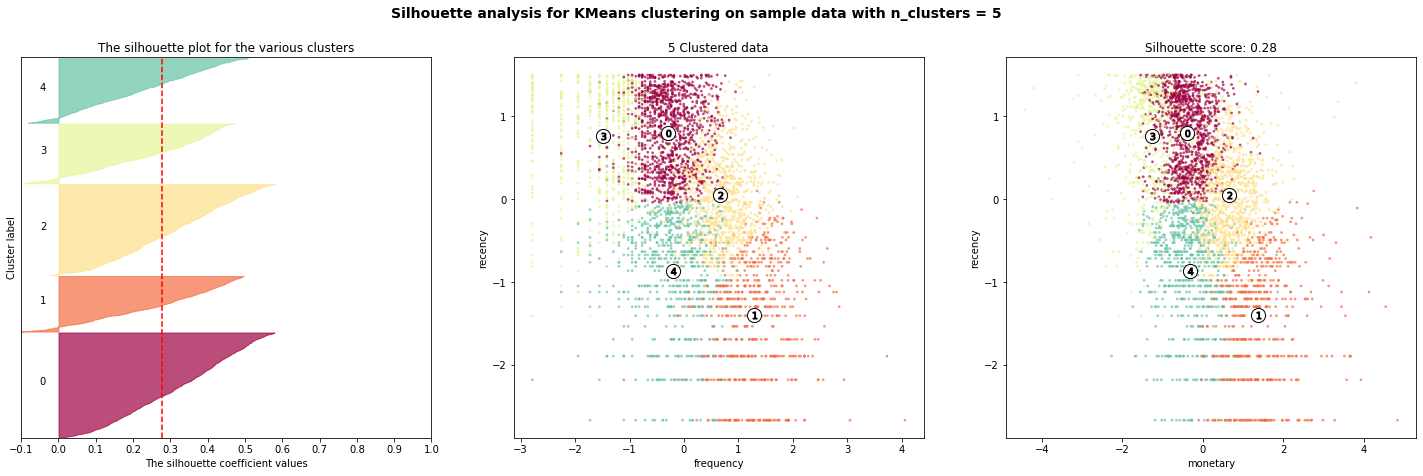

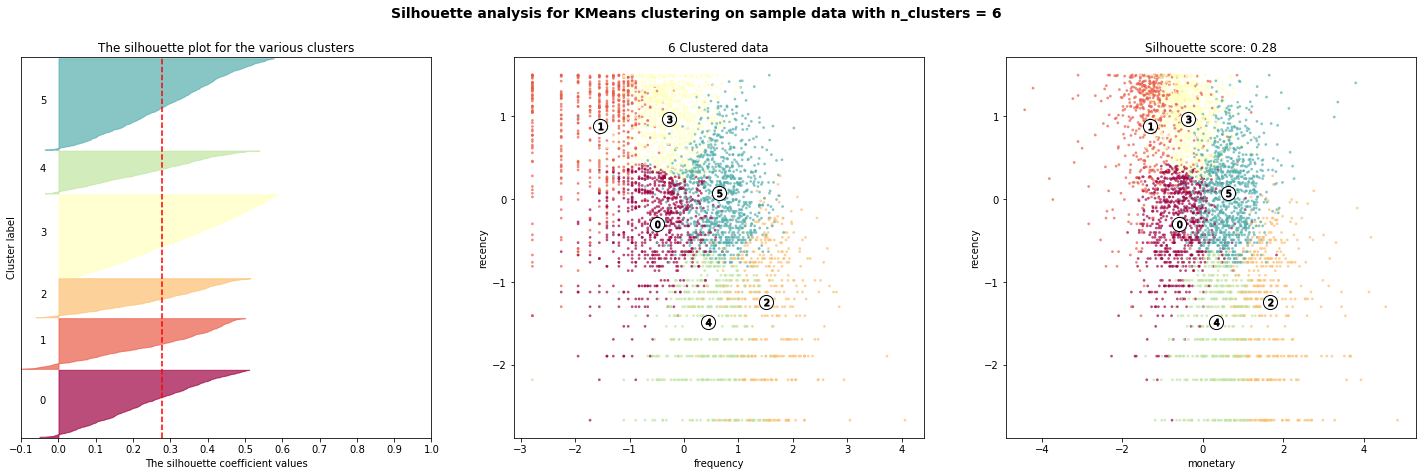

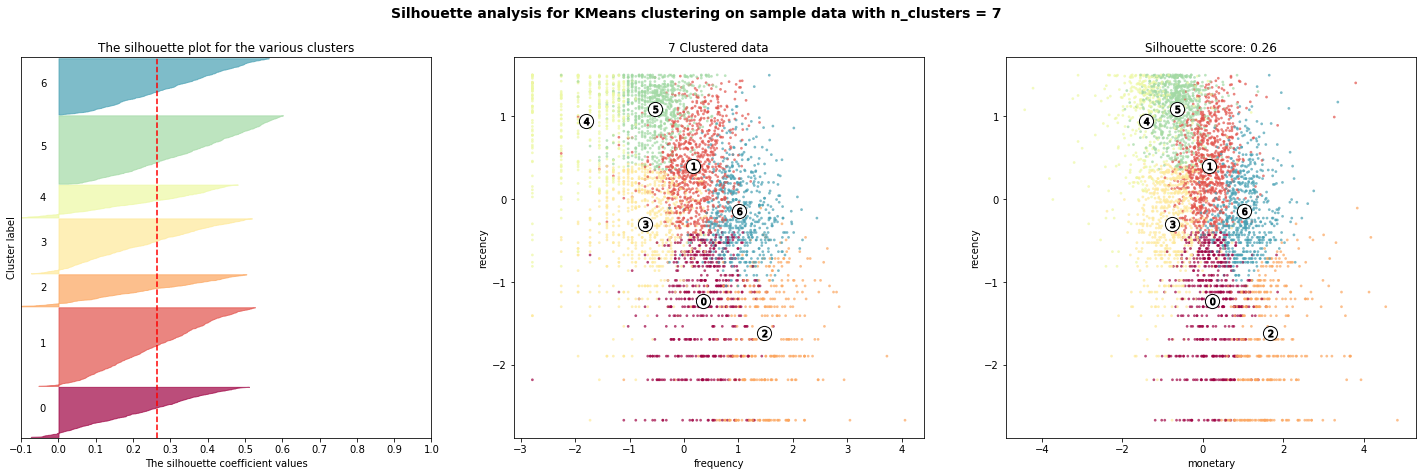

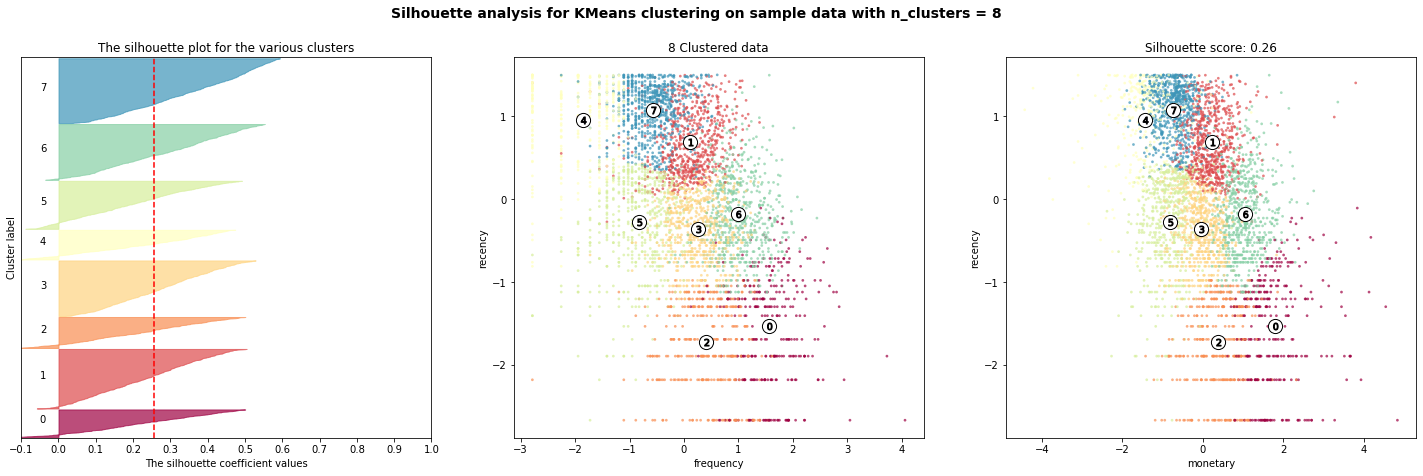

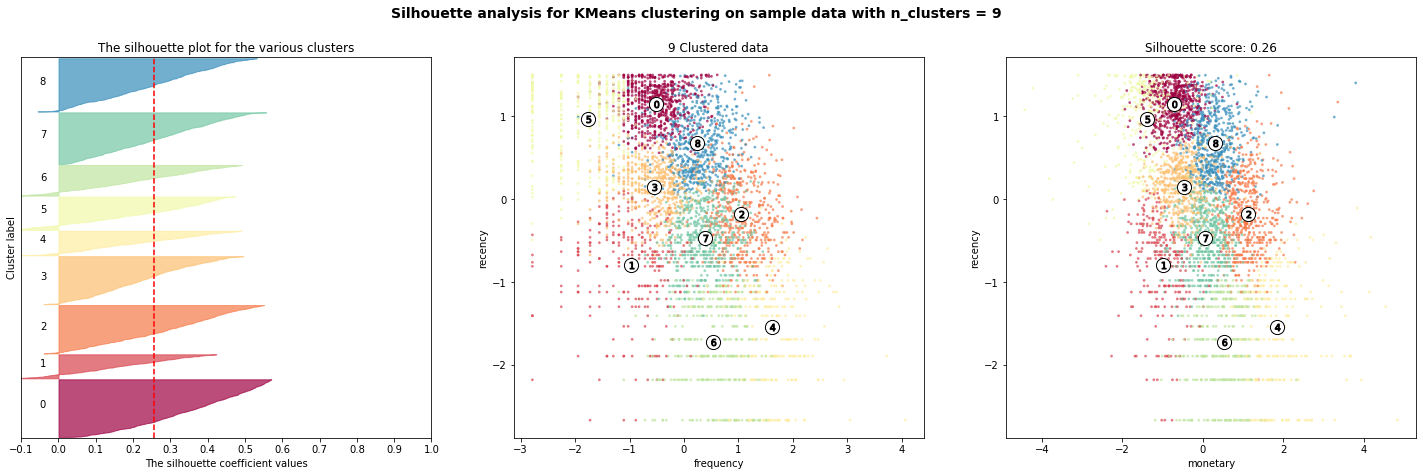

In [114]:
# K-Means (1 to 10 cluster)
cluster_centers = dict()
feature_vector = ['recency',  'frequency','monetary']

for n_clusters in range(3,10):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [115]:
features = ['recency',  'frequency','monetary']

for i in range(3,10):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.30
Centers of each cluster:
      recency   frequency     monetary
0    8.151708  160.630981  2957.539124
1  123.102995   10.583487   223.928291
2   46.975081   51.351821   829.942085
--------------------------------------------------
for 4 clusters the silhouette score is 0.30
Centers of each cluster:
      recency   frequency     monetary
0    8.398528  188.865228  3501.854358
1  146.737763   10.486130   222.261105
2   76.089923   63.071270  1088.157493
3   13.951329   30.086814   467.506642
--------------------------------------------------
for 5 clusters the silhouette score is 0.28
Centers of each cluster:
      recency   frequency     monetary
0  138.429813   26.197499   433.219880
1    6.048302  206.881923  3871.178650
2   47.248475   91.651206  1573.516699
3  129.780476    5.445242   148.264544
4   12.998030   29.162440   468.214155
--------------------------------------------------
for 6 clusters the silhouette score is 0.28
Centers of 

In [116]:
rfm['clusters']=cluster_centers[3]['labels']
rfm

,recency,frequency,monetary,recency_log,frequency_log,monetary_log,clusters
Kode_Pelanggan,,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942,2
12347.0,1,181,4299.80,0.000000,5.198497,8.366324,0
12348.0,74,31,1797.24,4.304065,3.433987,7.494007,2
12349.0,18,73,1757.55,2.890372,4.290459,7.471676,0
12350.0,309,17,334.40,5.733341,2.833213,5.812338,1
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,5.624018,2.302585,5.196285,1
18281.0,180,7,80.82,5.192957,1.945910,4.392224,1
18282.0,7,12,178.05,1.945910,2.484907,5.182064,1


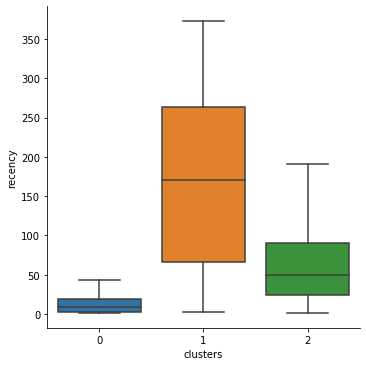

In [117]:
# Boxplot recency
sns.catplot(x="clusters", y="recency", kind="box", data=rfm, showfliers = False)

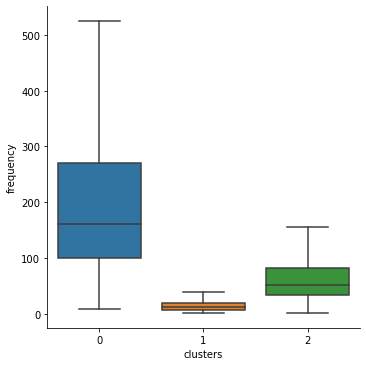

In [118]:
# Boxplot frequency
sns.catplot(x="clusters", y="frequency", kind="box", data=rfm, showfliers = False)

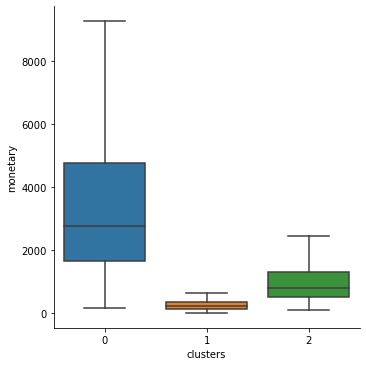

In [119]:
# Boxplot monetary
sns.catplot(x="clusters", y="monetary", kind="box", data=rfm, showfliers = False)

2    1784
1    1491
0     969
Name: clusters, dtype: int64


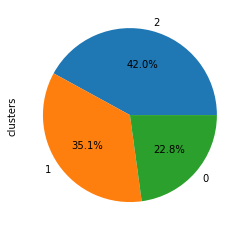

In [120]:
# Pie chart cluster
# Top 10 most total amount country
market = rfm.clusters.value_counts()
print(market)
market.plot(kind='pie', autopct='%1.1f%%')

## Number 4

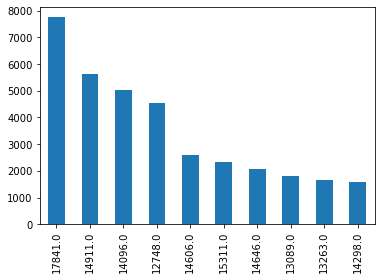

In [121]:
# Top 10 customer
data.Kode_Pelanggan.value_counts().sort_values(ascending=False).iloc[:10].plot(kind='bar')

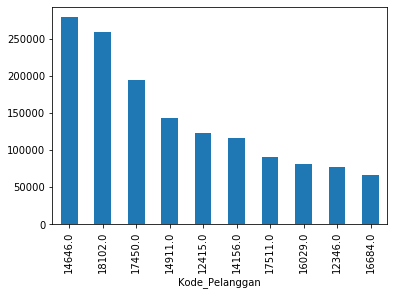

In [122]:
# Top 10 most spend money customer
data.groupby('Kode_Pelanggan')['Jumlah_Total'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar')

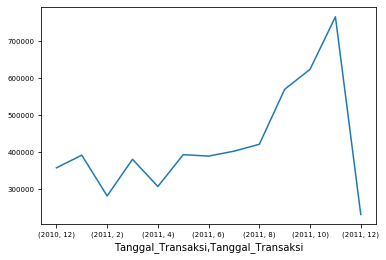

In [128]:
# Time series total product sell each month
data.groupby([data['Tanggal_Transaksi'].dt.year,data['Tanggal_Transaksi'].dt.month])['Jumlah'].sum().plot(kind='line', fontsize=7)

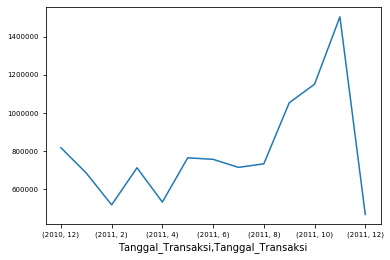

In [129]:
# Time series total income each month
data.groupby([data['Tanggal_Transaksi'].dt.year,data['Tanggal_Transaksi'].dt.month])['Jumlah_Total'].sum().plot(kind='line', fontsize=7)